In [5]:
%matlab

img = double(imread('face.jpg'));

for numOfBit = 1 : 8
  
    numOfLevel = 2.^ numOfBit;
    levelGap = 256 / numOfLevel;
    quantizedImg = uint8(ceil(img / levelGap) * levelGap - 1); % quantization
   
  
    subplot(2, 4, 9 - numOfBit), imshow(quantizedImg);
    if numOfBit == 1
        name = [num2str(numOfBit) '-bit'];
    else
        name = [num2str(numOfBit) '-bits'];
    end
    title(name);
    
    imwrite(quantizedImg, ['Quantization_' name '.png'] );
end

SyntaxError: invalid syntax (1577538773.py, line 3)

In [1]:
import cv2
import os

In [ ]:
def BrightnessContrast(brightness=0):
    brightness = cv2.getTrackbarPos('Brightness',
                                    'SMIU')
    contrast = cv2.getTrackbarPos('Contrast',
                                  'SMIU')
    effect = controller(img, brightness,
                        contrast)
 
    cv2.imshow('Effect', effect)
 
def controller(img, brightness=255,
               contrast=127):

    brightness = int((brightness - 0) * (255 - (-255)) / (510 - 0) + (-255)) 
    contrast = int((contrast - 0) * (127 - (-127)) / (254 - 0) + (-127))
 
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            max = 255
 
        else:
            shadow = 0
            max = 255 + brightness
        al_pha = (max - shadow) / 255
        ga_mma = shadow
 
        cal = cv2.addWeighted(img, al_pha,
                              img, 0, ga_mma)
 
    else:
        cal = img
 
    if contrast != 0:
        Alpha = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        Gamma = 127 * (1 - Alpha)
 
        cal = cv2.addWeighted(cal, Alpha,
                              cal, 0, Gamma)

    cv2.putText(cal, 'B:{},C:{}'.format(brightness,
                                        contrast), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
 
    return cal
 
if __name__ == '__main__':
    original = cv2.imread("face.jpg")
    img = original.copy()
 
    cv2.namedWindow('SMIU')
    cv2.imshow('SMIU', original)
    cv2.createTrackbar('Brightness',
                       'SMIU', 255, 2 * 255,
                       BrightnessContrast)
    cv2.createTrackbar('Contrast', 'SMIU',
                       127, 2 * 127,
                       BrightnessContrast) 

    BrightnessContrast(0)
cv2.waitKey(0)

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def quantimage(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

In [10]:
image = cv2.imread('face.jpg')

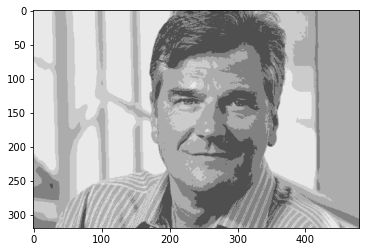

In [11]:
plt.imshow(quantimage(image,5))
plt.show()

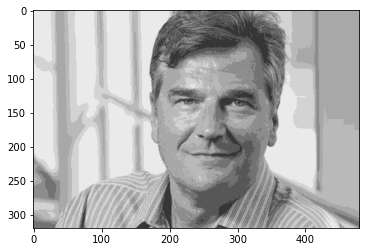

In [12]:
plt.imshow(quantimage(image,8))
plt.show()

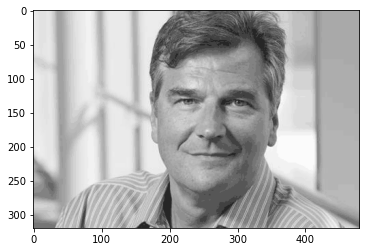

In [13]:
plt.imshow(quantimage(image,25))
plt.show()

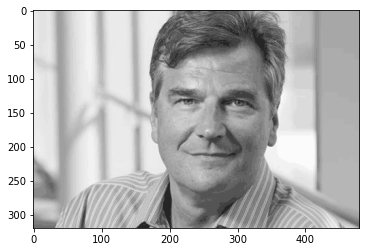

In [14]:
plt.imshow(quantimage(image,35))
plt.show()

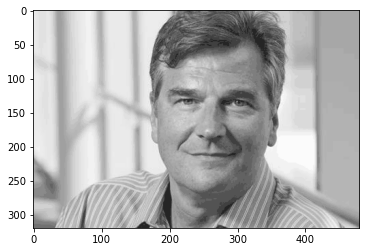

In [15]:
plt.imshow(quantimage(image,45))
plt.show()

In [3]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse

parser = argparse.ArgumentParser(description='Code for Changing the contrast and brightness of an image')
parser.add_argument('--input', help='Path to input image.', default='face.jpg')
args = parser.parse_args()
image = cv.imread(cv.samples.findFile(args.input))
if image is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0
beta = 0 

print(' Basic Linear Transforms ')
print('-------------------------')
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
cv.imshow('Original Image', image)
cv.imshow('New Image', new_image)

cv.waitKey()

usage: ipykernel_launcher.py [-h] [--input INPUT]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\lenovo\AppData\Roaming\jupyter\runtime\kernel-8397bff3-d750-42e6-b020-f3cc27ce1bca.json


SystemExit: 2